In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"E:\STUDY MATERIALS\IIT MADRAS\SEMESTER 2\ML OPs\DA5402-ML_Ops\Assignment 1\manual_mlops_project\data\raw\ai4i2020.csv")

df = pd.DataFrame(data)
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df = df.drop(['UDI','Product ID','TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 📋 Dataset Overview
The raw dataset contains **10,000 records** with 14 columns. After dropping identifier columns (`UDI`, `Product ID`) and the individual failure-mode flags (`TWF`, `HDF`, `PWF`, `OSF`, `RNF`), we retain 7 columns that form the core feature set:

| Feature | Description |
|---|---|
| `Type` | Machine quality grade — High (H), Medium (M), Low (L) |
| `Air temperature [K]` | Ambient air temperature |
| `Process temperature [K]` | Operating process temperature |
| `Rotational speed [rpm]` | Spindle speed |
| `Torque [Nm]` | Applied torque |
| `Tool wear [min]` | Accumulated tool usage time |
| `Machine failure` | **Target variable** — 1 = failure, 0 = no failure |

The failure sub-modes (TWF, HDF, PWF, OSF, RNF) were dropped here since the focus is on predicting the overall `Machine failure` flag.

In [4]:
df.shape

(10000, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


In [6]:
df.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64

In [257]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### 📊 Statistical Summary — Key Observations

**Air temperature [K]:** Mean ≈ 300 K, std ≈ 2 K. Narrowly distributed, suggesting a controlled environment with little ambient variation.

**Process temperature [K]:** Mean ≈ 310 K, std ≈ 1.48 K. Even tighter than air temperature — process temperature is well-regulated.

**Rotational speed [rpm]:** Mean ≈ 1539 rpm, std ≈ 179 rpm. Max value of 2886 rpm is notably far from the mean (>7 std), hinting at extreme high-speed outliers.

**Torque [Nm]:** Mean ≈ 40 Nm, std ≈ 10 Nm. Max of 76.6 Nm is ~3.7 std above mean; a few high-torque observations may correspond to failure events.

**Tool wear [min]:** Ranges from 0 to 253 min with a roughly uniform distribution (mean ≈ 108, 50th percentile ≈ 108), suggesting tools are used across their full lifespan before replacement.

**Machine failure:** Mean = 0.034 → only **3.4% of records are failures**, confirming a heavily **imbalanced target** that will need attention during modelling.

In [16]:
cat_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include='number').columns
print(cat_features)
print(numerical_features)

Index(['Type'], dtype='object')
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure'],
      dtype='object')


## **1 : UNIVARIATE ANALYSIS**

### **Categorical Features**

In [17]:
bin_features = [col for col in df.columns 
                if df[col].nunique()==2 ]

combined_features =  bin_features + ["Type"]

print(bin_features)
print(combined_features)



['Machine failure']
['Machine failure', 'Type']


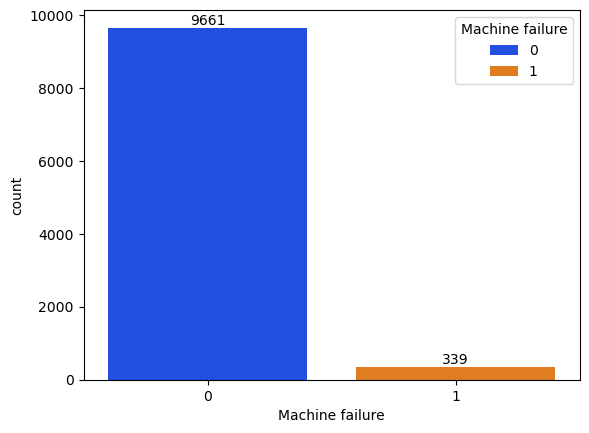

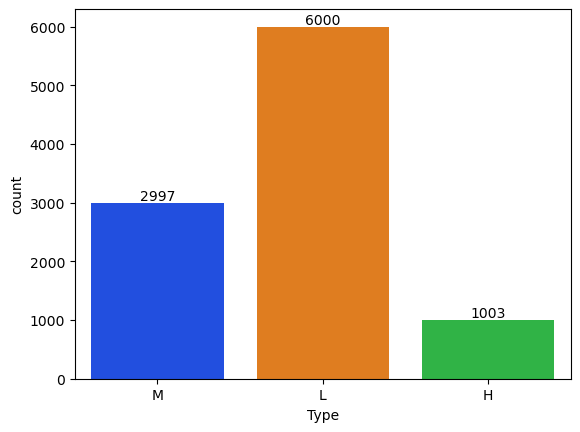

In [260]:
for features in combined_features:
    ax = sns.countplot(data=df, x=features ,palette="bright" , hue = features)

    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()
    




### 🔍 Interpretation — Categorical & Binary Feature Distributions

**Machine failure (binary):** The count plot confirms severe class imbalance — approximately **9,661 non-failures vs. 339 failures** (~3.4%). Any predictive model must account for this imbalance (e.g., oversampling, class weighting, or appropriate evaluation metrics like F1 / ROC-AUC rather than accuracy).

**Type (product grade):** The dataset is dominated by **Low (L) grade** machines (~6,000 records), followed by Medium (M) (~3,000) and High (H) (~1,000). The distribution reflects a realistic manufacturing setting where cheaper/lower-grade machines are deployed more widely.

### **Numerical features**


In [261]:
numerical_features = numerical_features.drop('Machine failure') 
numerical_features

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

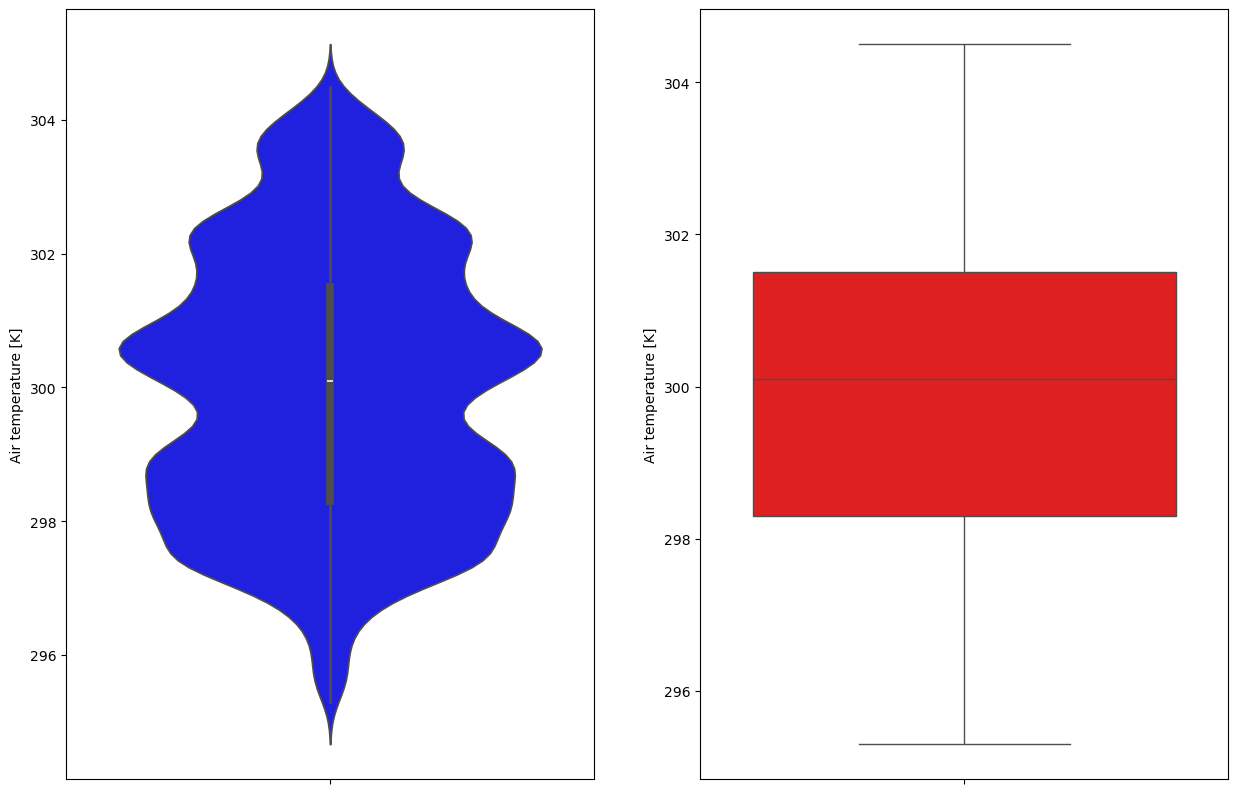

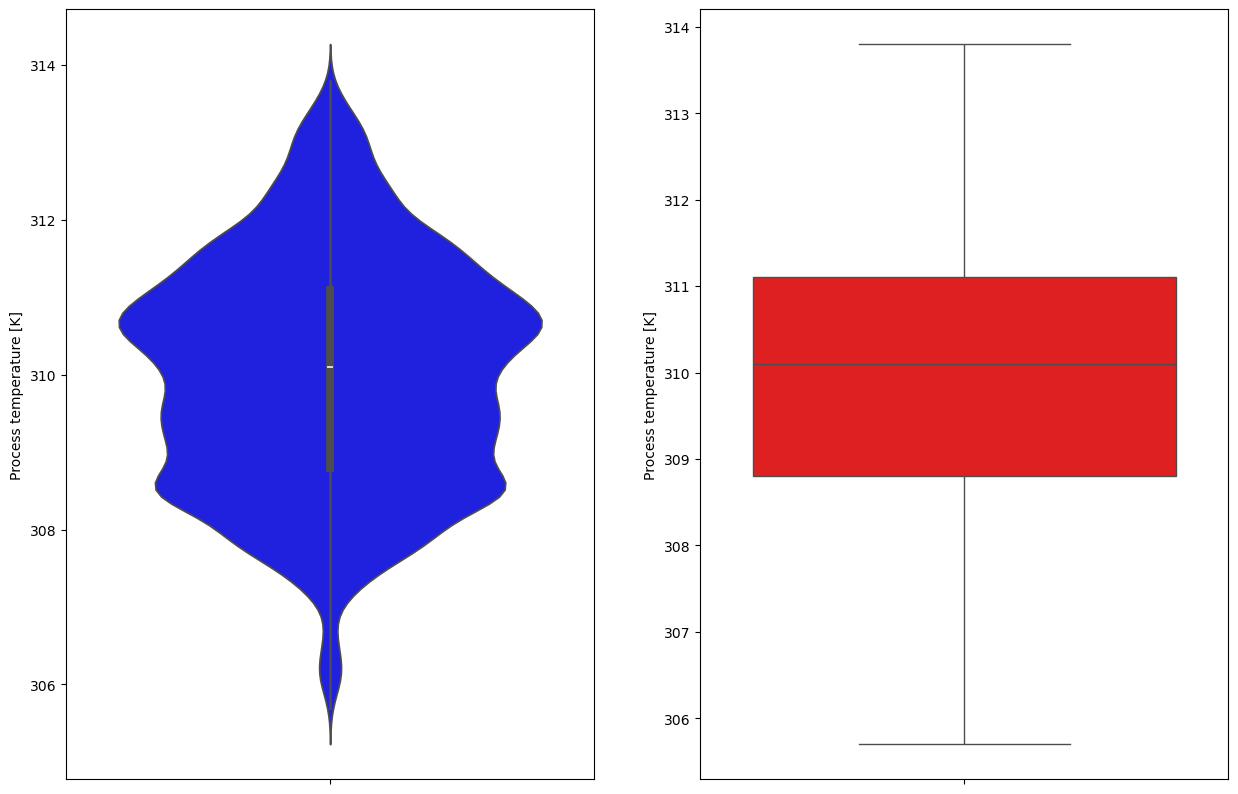

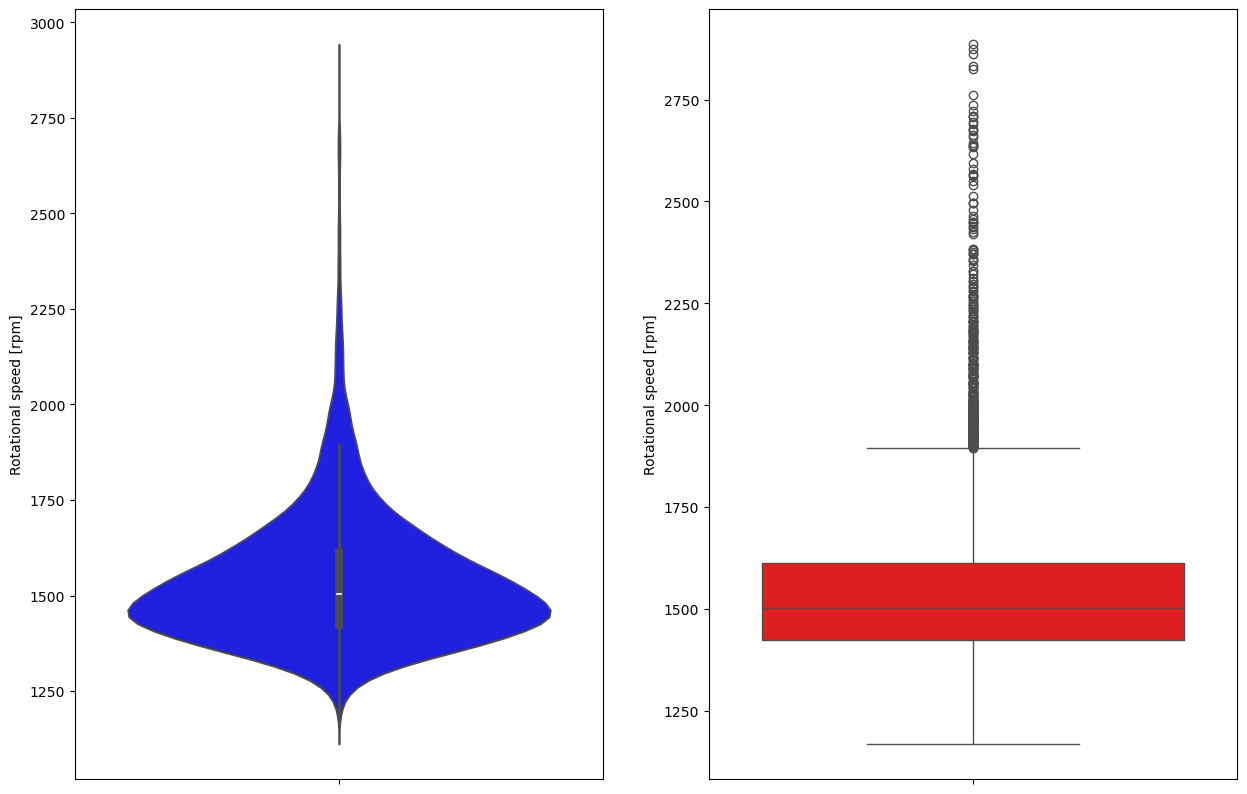

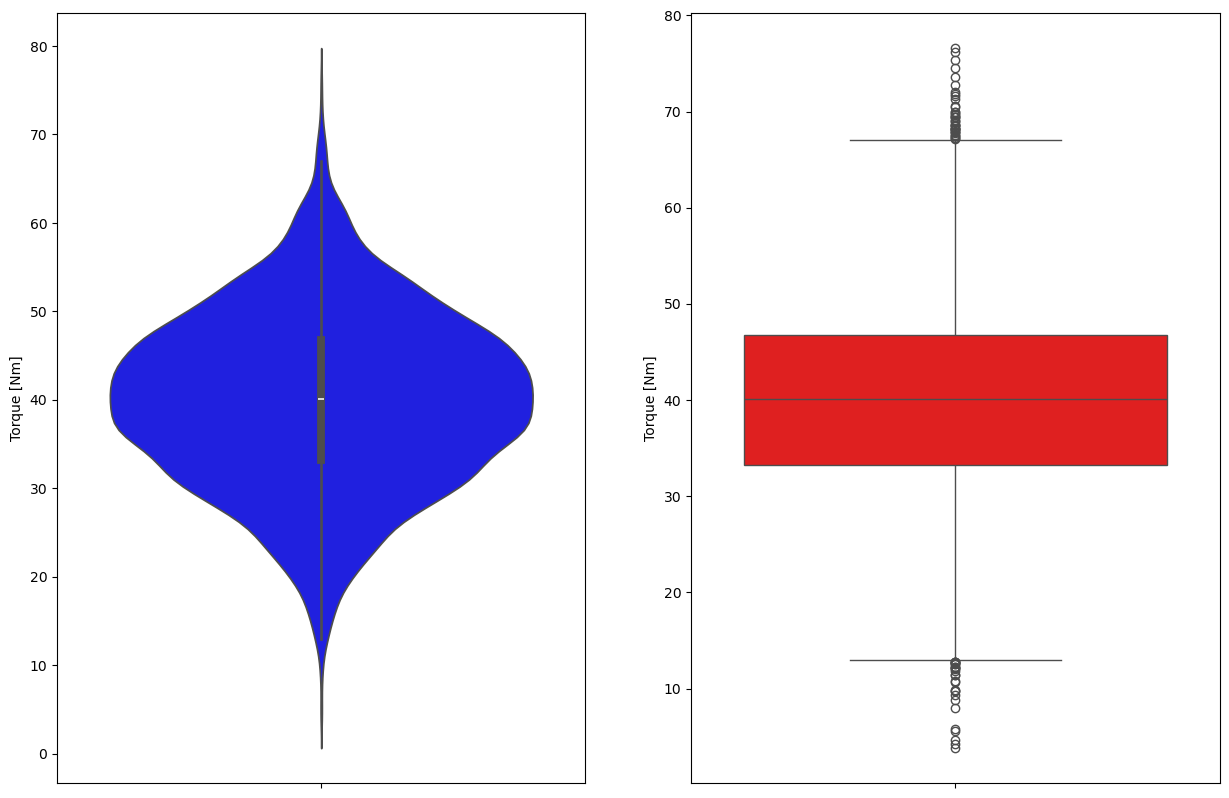

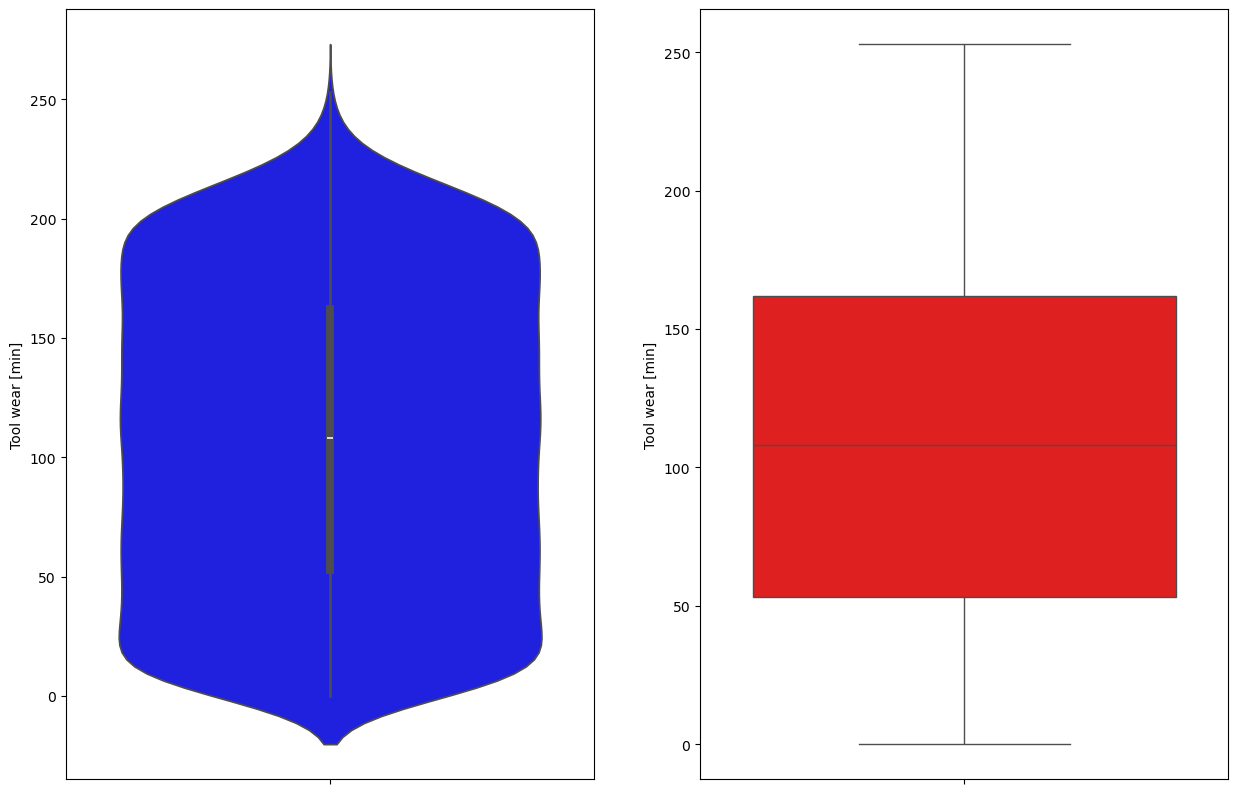

In [262]:
for feature in numerical_features:
    fig,axs = plt.subplots(1,2,figsize=(15,10))
    sns.violinplot(data = df, y=feature , ax=axs[0],color='blue')
    sns.boxplot(data=df ,y=feature , ax=axs[1],color='red' )
    plt.show()

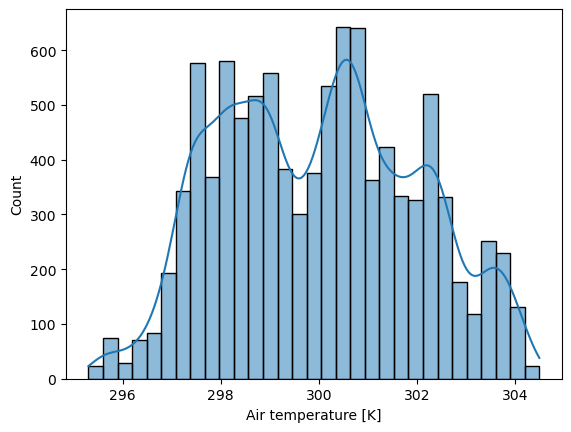

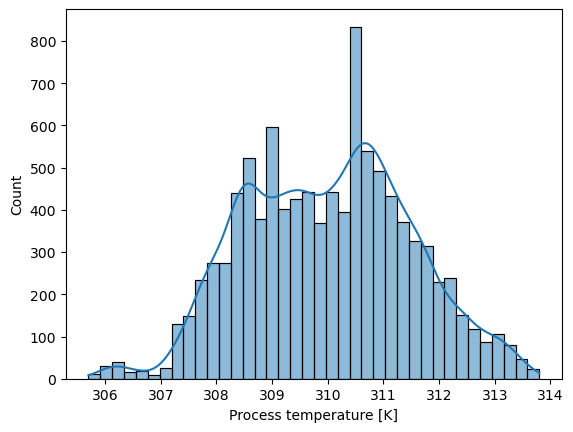

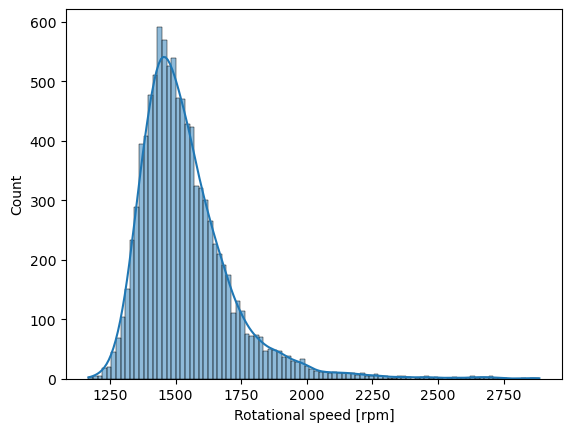

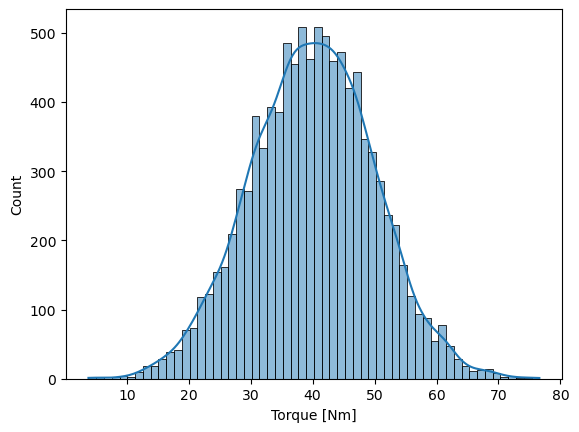

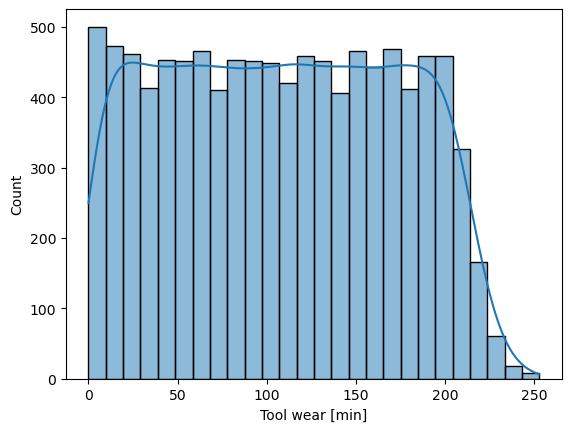

In [263]:
for feature in numerical_features:
    sns.histplot(data=df, x=feature, kde=True)
    plt.show()

### 🔍 Interpretation — Numerical Feature Distributions

**Air temperature & Process temperature:** Both show near-normal, tightly concentrated distributions around their means. The process temperature is consistently ~10 K higher than air temperature — consistent with a machine generating heat during operation.

**Rotational speed [rpm]:** Displays a roughly normal core distribution but with a pronounced right tail in the box/violin plot (confirmed later as 418 IQR-based outliers). These high-speed values may reflect edge-case operating conditions linked to failures.

**Torque [Nm]:** Approximately normal and centred around 40 Nm. Some right-tail outliers (69 by IQR) represent unusually high torque scenarios — particularly important as high torque correlates strongly with failure.

**Tool wear [min]:** Appears **uniformly distributed** from 0 to ~253 min. This makes sense — tool wear accumulates monotonically over time and is regularly reset when tools are replaced, creating an approximately flat distribution across the usage range.

## **2 : BIVARIATE ANALYSIS**

### **Categorical - Categorical**

- there is only one category among feature

### **Categorical - Target**

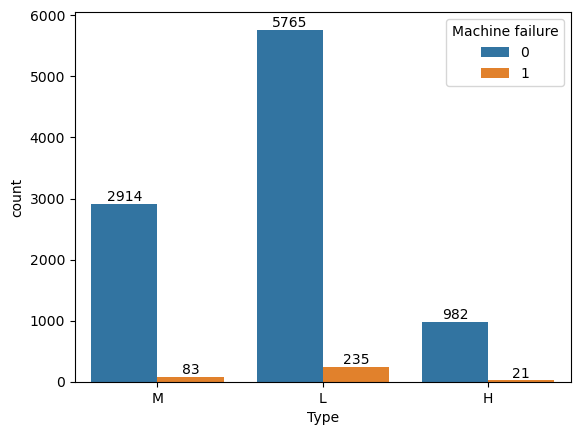

In [264]:
ax = sns.countplot(data=df, x='Type' ,hue='Machine failure')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In [18]:
print(pd.crosstab(df['Type'], df['Machine failure'],normalize='index'))
print("="*40)
print(pd.crosstab(df['Type'],df['Machine failure']))


Machine failure         0         1
Type                               
H                0.979063  0.020937
L                0.960833  0.039167
M                0.972306  0.027694
Machine failure     0    1
Type                      
H                 982   21
L                5765  235
M                2914   83


### 🔍 Interpretation — Product Type vs. Machine Failure

From the crosstab (row-normalised):

| Type | No Failure | Failure | Failure Rate |
|------|------------|---------|-------------|
| H (High)   | 982 | 21  | **2.1%** |
| L (Low)    | 5765 | 235 | **3.9%** |
| M (Medium) | 2914 | 83  | **2.8%** |

**Low-grade (L) machines have the highest failure rate (~3.9%)**, nearly double that of High-grade machines (~2.1%). This aligns with manufacturing intuition — lower quality components experience higher wear-induced failure. While the absolute failure counts are highest for L (due to volume), the proportional failure rate clearly varies by grade. Type could be a useful feature in downstream modelling.

### **Numeric - Target**

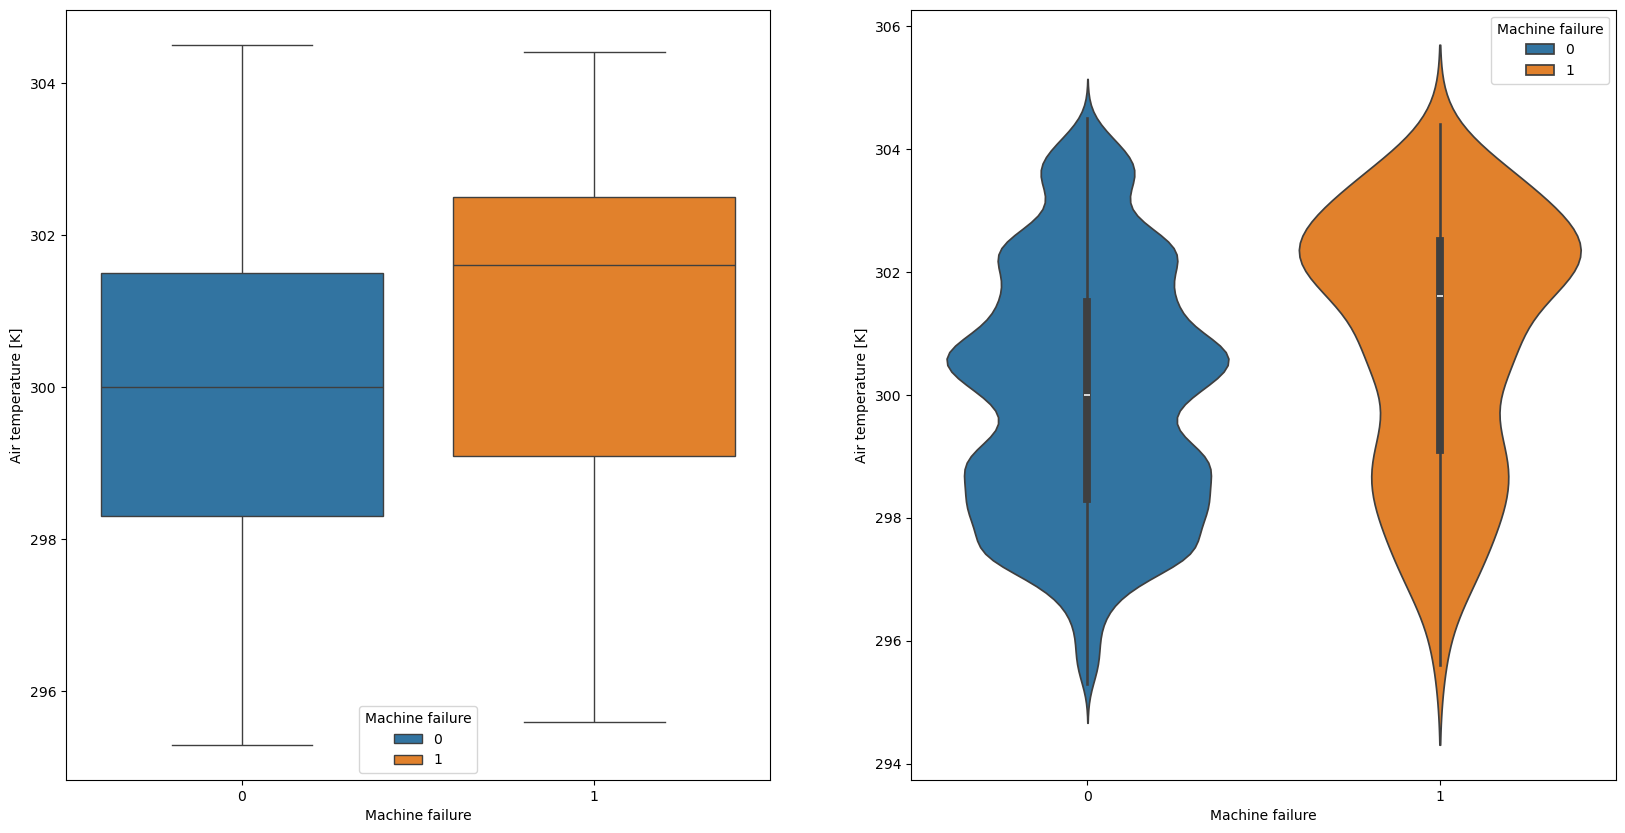

Machine failure
0    299.973999
1    300.886431
Name: Air temperature [K], dtype: float64


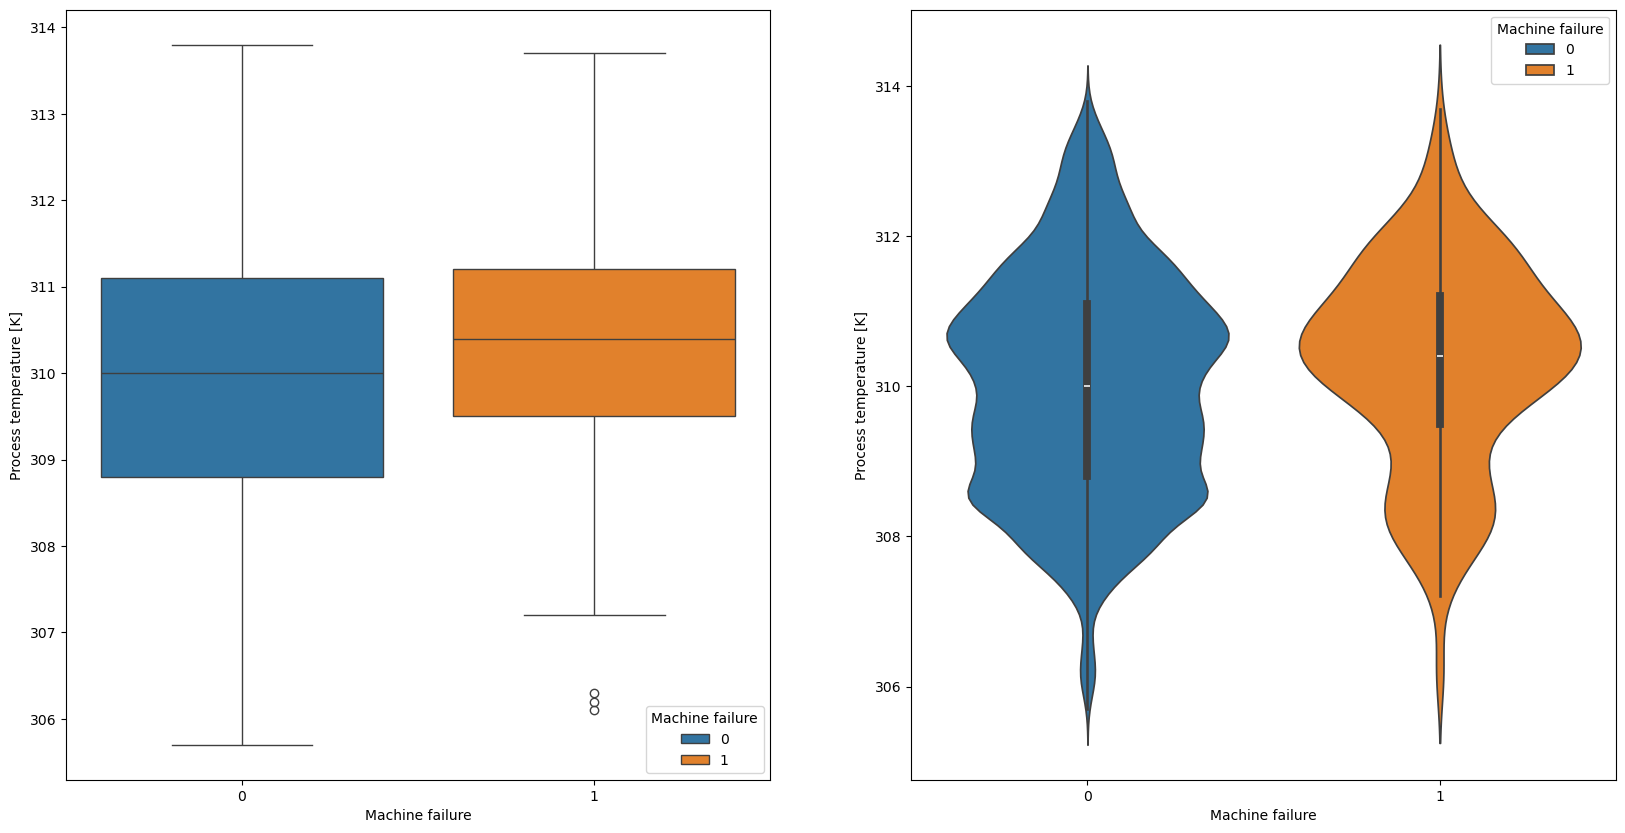

Machine failure
0    309.995570
1    310.290265
Name: Process temperature [K], dtype: float64


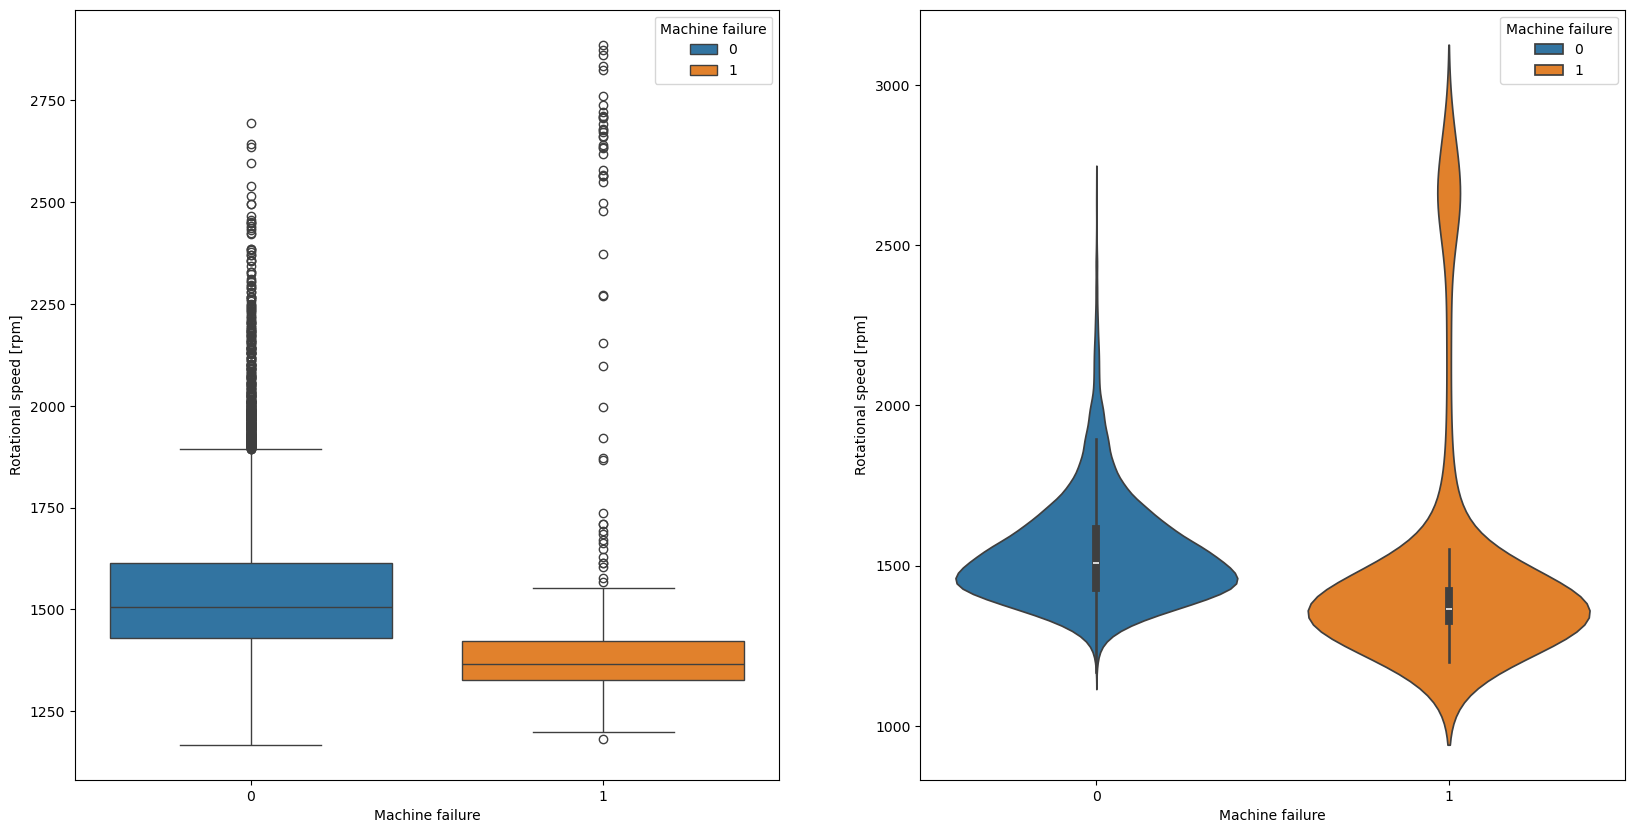

Machine failure
0    1540.260014
1    1496.486726
Name: Rotational speed [rpm], dtype: float64


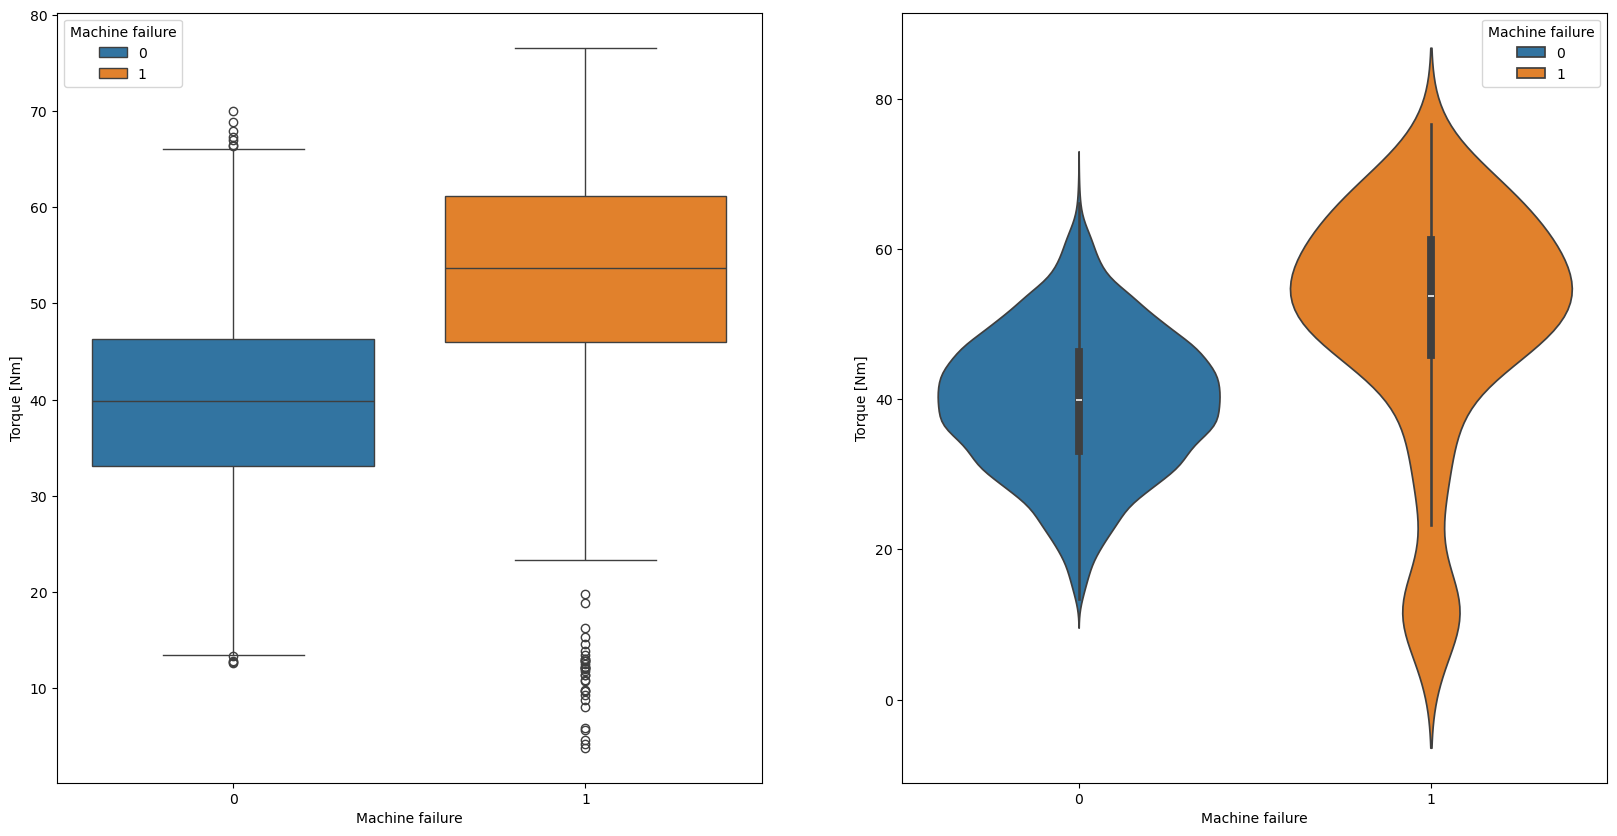

Machine failure
0    39.629655
1    50.168142
Name: Torque [Nm], dtype: float64


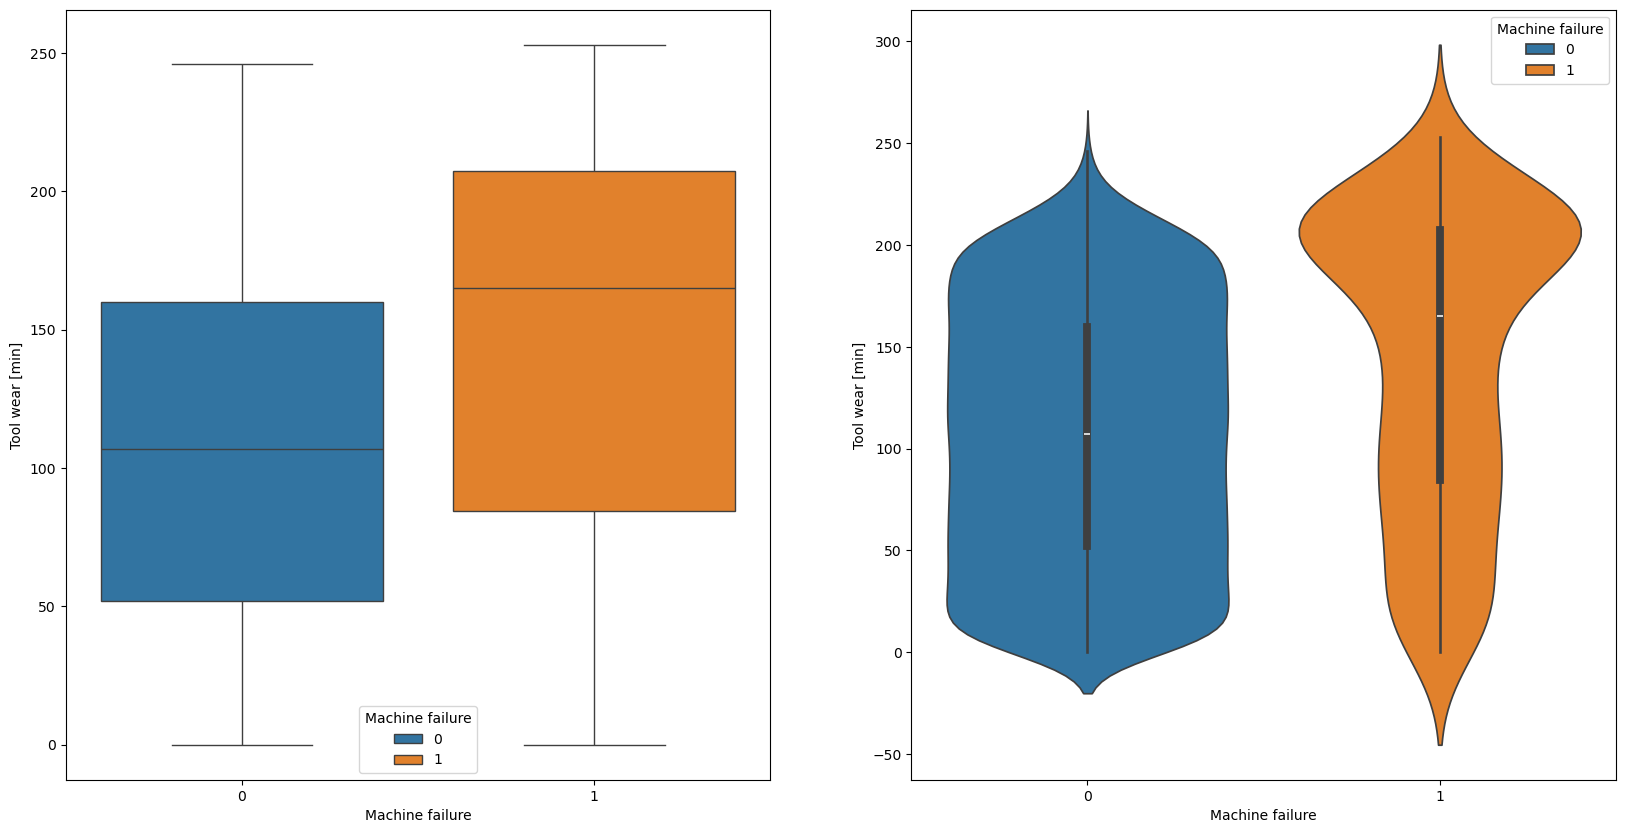

Machine failure
0    106.693717
1    143.781711
Name: Tool wear [min], dtype: float64


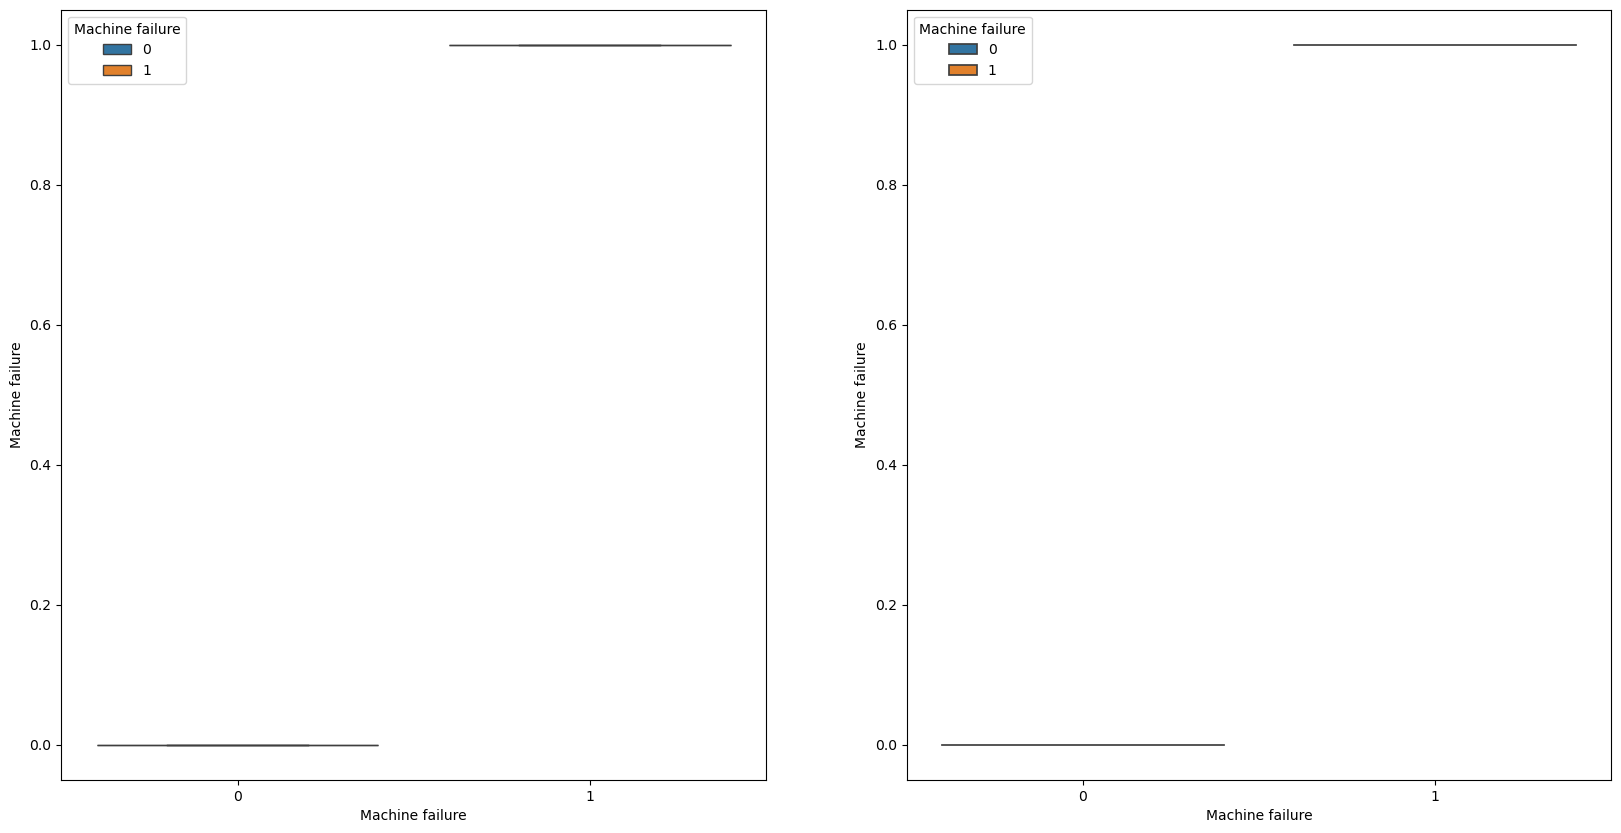

Machine failure
0    0.0
1    1.0
Name: Machine failure, dtype: float64


In [19]:
for feature in numerical_features:
    fig,axs = plt.subplots(1,2,figsize=(20,10))
    sns.boxplot(data=df, y=feature ,x='Machine failure',ax=axs[0],hue='Machine failure')
    sns.violinplot(data =df ,y=feature ,x='Machine failure',ax=axs[1],hue='Machine failure')
    plt.show()
    print(df.groupby('Machine failure')[feature].mean())
    

### 🔍 Interpretation — Numerical Features vs. Machine Failure

Comparing group means (failure = 1 vs. failure = 0):

| Feature | No Failure (mean) | Failure (mean) | Difference |
|---|---|---|---|
| Air temperature [K] | 299.97 | 300.89 | +0.92 K |
| Process temperature [K] | 309.99 | 310.29 | +0.30 K |
| Rotational speed [rpm] | 1540.3 | 1496.5 | **−43.8 rpm** |
| Torque [Nm] | 39.6 | 50.2 | **+10.6 Nm** ↑↑ |
| Tool wear [min] | 106.7 | 143.8 | **+37.1 min** ↑↑ |

**Key findings:**
- **Torque** shows the largest relative difference — failed machines operated at ~27% higher average torque. This is the strongest individual numeric signal.
- **Tool wear** is substantially higher on average for failures (+35%), consistent with the expectation that aged tools are more prone to breakdowns.
- **Rotational speed** is slightly *lower* during failures. This is counterintuitive but may reflect a physical coupling: high torque at lower RPM is a known stress regime for machine components.
- **Temperature features** show only marginal mean differences and are likely weak predictors in isolation.

## **3 : MUTIVARIATE ANALYSIS**

<Axes: >

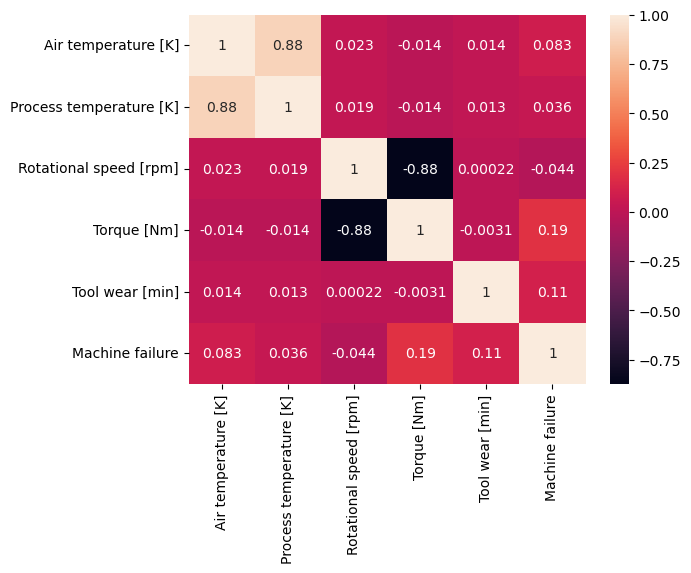

In [267]:
corr_mat = df.select_dtypes(include='number').corr()
sns.heatmap(corr_mat, annot=True)

### 🔍 Interpretation — Correlation Heatmap

Notable correlations with `Machine failure`:
- **Torque [Nm]** has the highest positive correlation with Machine failure — confirming bivariate findings.
- **Tool wear [min]** also shows a moderate positive correlation.
- **Air temperature** and **Process temperature** are highly correlated with each other (~0.88), indicating near-collinearity. However, neither correlates strongly with failure.
- **Rotational speed** shows a moderate negative correlation with Torque (physically expected: high RPM at constant power → lower torque), and a weak negative correlation with failure.

The **Torque–Rotational speed** inverse relationship is the most actionable signal — machines operating in a low-speed / high-torque regime appear to be at elevated failure risk.

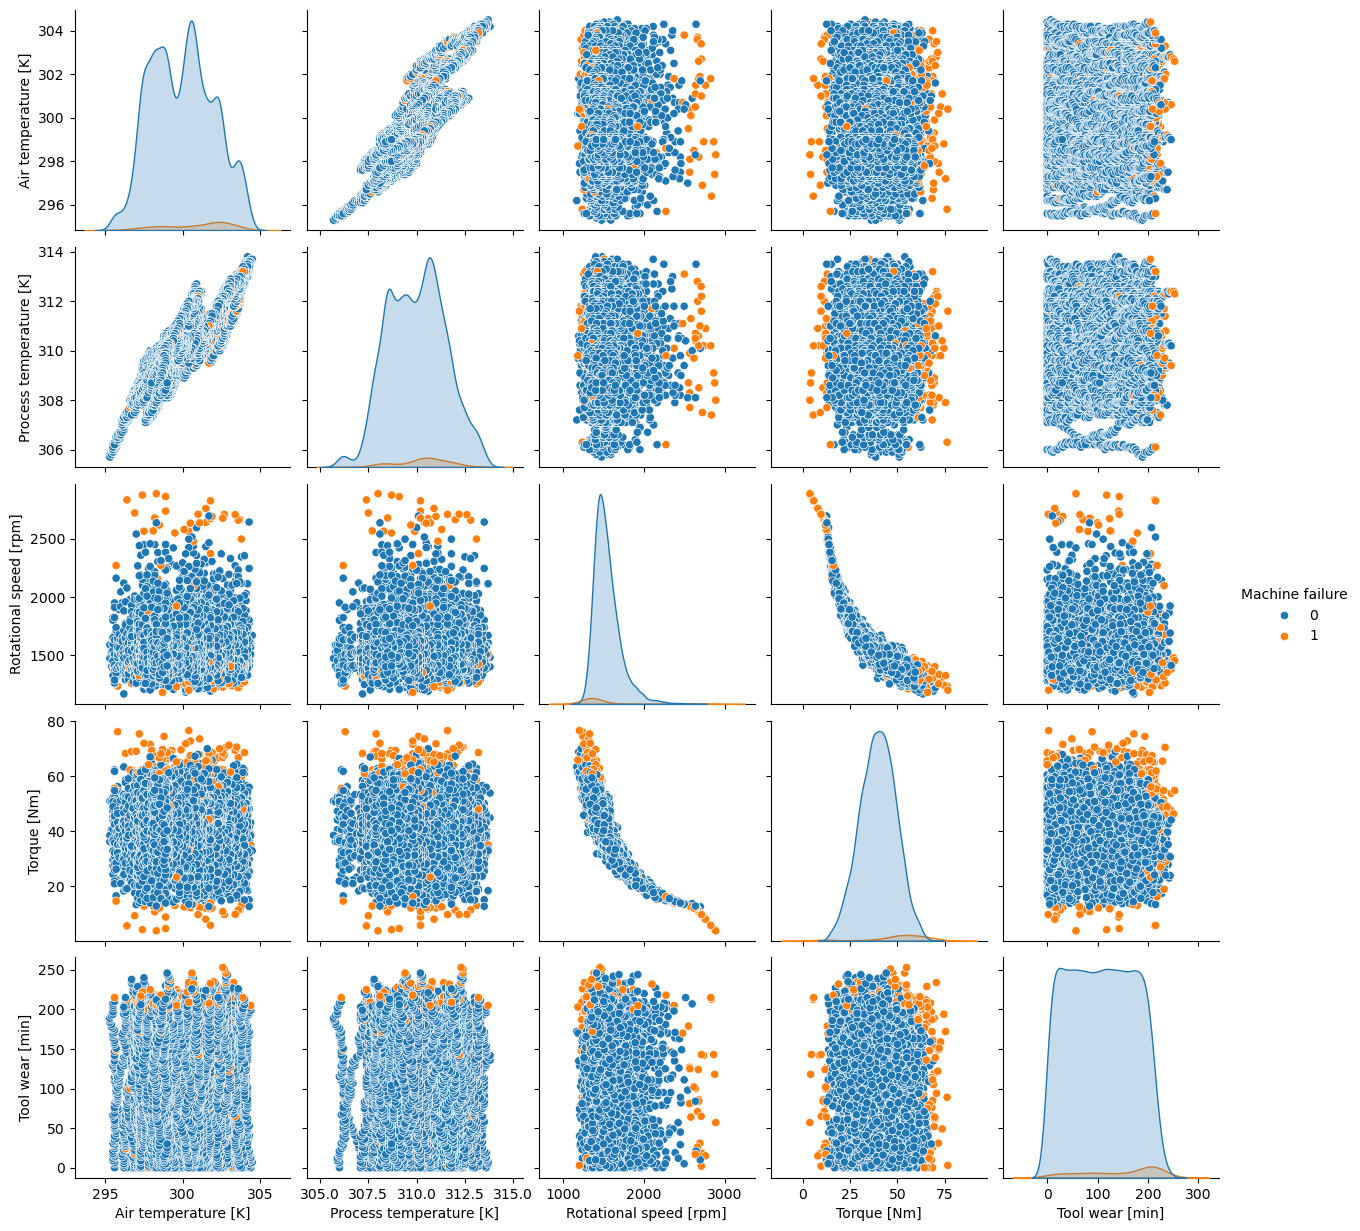

In [268]:
sns.pairplot(data=df,hue='Machine failure')

### 🔍 Interpretation — Pairplot (Coloured by Machine Failure)

The pairplot visually confirms several bivariate findings:
- **Torque vs. Tool wear** shows the clearest separation between failure (orange) and non-failure (blue) clusters — failure cases cluster at **high torque AND high tool wear** simultaneously.
- **Rotational speed vs. Torque** exhibits an inverse funnel pattern: failure cases tend to sit at the extremes (very high or very low RPM combined with high torque).
- Temperature features show heavily overlapping distributions for both classes, reinforcing their limited predictive value as standalone features.
- Failure cases (orange dots) are sparse but consistently appear at the upper ranges of torque and tool wear — supporting the use of these two features as primary predictors.

## **4 : OUTLIER ANALYSIS**

In [20]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.75)
    IQR = Q2 -Q1

    lower = Q1 - 1.5 * IQR
    upper = Q2 + 1.5 * IQR

    outliers = df[(df[col]<lower) | (df[col]>upper)]

    print(f"{col} : {len(outliers)} outliers")


Air temperature [K] : 0 outliers
Process temperature [K] : 0 outliers
Rotational speed [rpm] : 418 outliers
Torque [Nm] : 69 outliers
Tool wear [min] : 0 outliers
Machine failure : 339 outliers


### 🔍 Interpretation — IQR Outlier Counts

| Feature | Outlier Count | Note |
|---|---|---|
| Air temperature [K] | 0 | Tightly bounded distribution |
| Process temperature [K] | 0 | Tightly bounded distribution |
| Rotational speed [rpm] | **418** | ~4.2% of rows — significant right-tail |
| Torque [Nm] | **69** | High-torque extreme events |
| Tool wear [min] | 0 | Uniformly distributed, no outliers |
| Machine failure | 339 | IQR flags all positives (expected for binary) |

Temperature columns have no IQR outliers, consistent with their narrow distributions. The **418 rotational speed outliers** are the most numerous and warrant investigation — they may represent real extreme operating conditions or sensor anomalies. The `Machine failure` "outliers" are simply all the failure cases (since 75th percentile = 0), not true outliers.

In [21]:
for col in numerical_features:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_mask = (df[col] < lower) | (df[col] > upper)
    
    failure_rate_outliers = df.loc[outlier_mask, 'Machine failure'].mean()
    failure_rate_normal = df.loc[~outlier_mask, 'Machine failure'].mean()
    
    print(f"\n{col}")
    print(f"Failure rate (Normal)  : {failure_rate_normal:.4f}")
    print(f"Failure rate (Outliers): {failure_rate_outliers:.4f}")




Air temperature [K]
Failure rate (Normal)  : 0.0339
Failure rate (Outliers): nan

Process temperature [K]
Failure rate (Normal)  : 0.0339
Failure rate (Outliers): nan

Rotational speed [rpm]
Failure rate (Normal)  : 0.0317
Failure rate (Outliers): 0.0837

Torque [Nm]
Failure rate (Normal)  : 0.0279
Failure rate (Outliers): 0.8986

Tool wear [min]
Failure rate (Normal)  : 0.0339
Failure rate (Outliers): nan

Machine failure
Failure rate (Normal)  : 0.0000
Failure rate (Outliers): 1.0000


### 🔍 Interpretation — Failure Rates Inside vs. Outside Outlier Zones

| Feature | Normal Failure Rate | Outlier Failure Rate | Lift |
|---|---|---|---|
| Air temperature [K] | 3.39% | N/A (no outliers) | — |
| Process temperature [K] | 3.39% | N/A (no outliers) | — |
| Rotational speed [rpm] | 3.17% | **8.37%** | **2.6×** |
| Torque [Nm] | 2.79% | **89.86%** | **32×** |
| Tool wear [min] | 3.39% | N/A (no outliers) | — |

**Torque outliers are extremely predictive of failure** — nearly 90% of IQR-flagged torque records correspond to a machine failure event. This is by far the most powerful outlier signal in the dataset.

**Rotational speed outliers** also carry elevated failure risk (~8.4% vs. 3.2% baseline), suggesting that anomalously high RPM is a genuine risk factor.

**Summary for modelling:** Torque and tool wear should be prioritised as features. The class imbalance (~3.4% failure rate) must be addressed during training. Outlier handling should be done carefully — torque outliers in particular should NOT be removed, as they are highly informative failure precursors.

---
### ✅ EDA Summary — Key Takeaways
1. **Dataset:** 10,000 records, 3.4% failure rate → severe class imbalance.
2. **Most predictive features:** Torque [Nm] > Tool wear [min] > Rotational speed [rpm].
3. **Low-grade (L) machines** fail at nearly double the rate of High-grade machines.
4. **Temperature features** are weakly predictive individually but may contribute in interaction terms.
5. **Torque outliers** (IQR-based) have a ~90% failure rate — extreme torque is almost always a failure event.
6. **No missing values** detected across any feature.
7. **Class imbalance handling** (e.g., SMOTE, class weights) is strongly recommended before building classifiers.